### STOCK PREDICTION - VERSION 1 

### Data Preprocessing - Stock Prediction

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [8]:
# Load dataset
data = pd.read_pickle("./data/data_pkls/nasdaq100.pkl")
data .head()
data['AAPL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49128400.0
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700.0
2024-01-16,182.160004,184.259995,180.929993,183.630005,183.630005,65603000.0


In [9]:
data.shape

(15618, 606)

In [10]:
#check features about companies
data.columns.get_level_values(1).unique()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Axes: xlabel='None-None', ylabel='Date'>

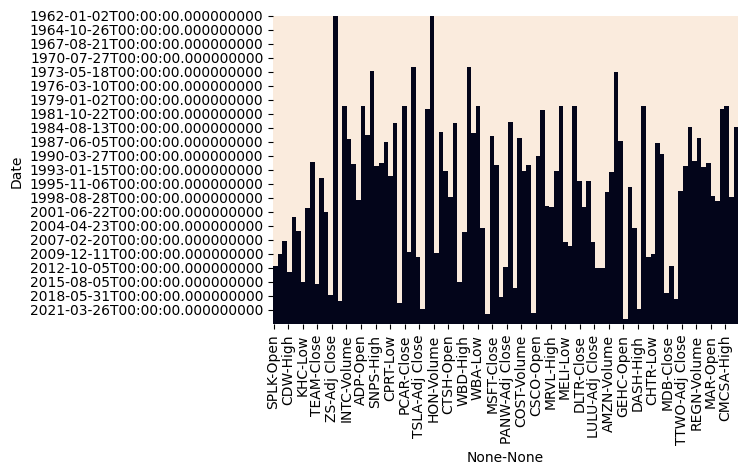

In [12]:
#Check for Missing values

plt.figure(figsize=(6,4))
sns.heatmap(data.isnull(),cbar=False)

In [14]:
#Filter data by a single ticker and drop missing values for that ticker
ticker = 'AAPL'
single_ticker = data.loc[:, [ticker]]

#if we want to filter by date
#single_ticker.loc[single_ticker.index >= dt.datetime.strptime("2020-01-01", "%Y-%m-%d")]

single_ticker.dropna(inplace=True)
single_ticker.head()

AAPL                                                     
                Open      High       Low     Close Adj Close       Volume
Date                                                                     
1980-12-12  0.128348  0.128906  0.128348  0.128348  0.099319  469033600.0
1980-12-15  0.122210  0.122210  0.121652  0.121652  0.094137  175884800.0
1980-12-16  0.113281  0.113281  0.112723  0.112723  0.087228  105728000.0
1980-12-17  0.115513  0.116071  0.115513  0.115513  0.089387   86441600.0
1980-12-18  0.118862  0.119420  0.118862  0.118862  0.091978   73449600.0

In [15]:
#drop ticker level for columns
single_ticker.columns = single_ticker.columns.droplevel(0)
single_ticker.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600.0


In [16]:
data_close = single_ticker['Close']
print(data_close)

Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2024-01-11    185.589996
2024-01-12    185.919998
2024-01-16    183.630005
2024-01-17    182.679993
2024-01-18    188.630005
Name: Close, Length: 10865, dtype: float64


In [17]:
# Assuming 'data' is your 'Close' column
data_reshaped = data_close.values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_reshaped)

In [18]:
# Split data into X (features) and y (target)
look_back = 60  # number of previous time steps to consider for predicting the next time step
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

In [19]:
# Reshape for LSTM layer: [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [20]:
# Splitting dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the LSTM Model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [22]:
# Initialize the RNN
model = Sequential()

In [23]:
# Adding the first LSTM layer and some Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

In [24]:
# Adding a second LSTM layer and some Dropout regularization
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

In [25]:
# Adding the output layer
model.add(Dense(units=1))

In [26]:
# Compiling the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the Model

In [28]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100

271/271 [==============================] - 26s 78ms/step - loss: 0.0017
Epoch 2/100
271/271 [==============================] - 21s 78ms/step - loss: 7.6634e-04
Epoch 3/100
271/271 [==============================] - 21s 79ms/step - loss: 5.0400e-04
Epoch 4/100
271/271 [==============================] - 21s 76ms/step - loss: 5.0731e-04
Epoch 5/100
271/271 [==============================] - 21s 76ms/step - loss: 4.9930e-04
Epoch 6/100
271/271 [==============================] - 21s 76ms/step - loss: 4.5597e-04
Epoch 7/100
271/271 [==============================] - 20s 75ms/step - loss: 4.3053e-04
Epoch 8/100
271/271 [==============================] - 20s 75ms/step - loss: 4.5813e-04
Epoch 9/100
271/271 [==============================] - 20s 75ms/step - loss: 4.0233e-04
Epoch 10/100
271/271 [==============================] - 22s 80ms/step - loss: 4.0589e-04
Epoch 11/100
271/271 [==============================] - 21s 76ms/step - loss: 4.7455e-04
Epoch 12/100
271/271 [===========

### Making Predictions and Visualizing the Results

In [29]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

68/68 [==============================] - 2s 17ms/step


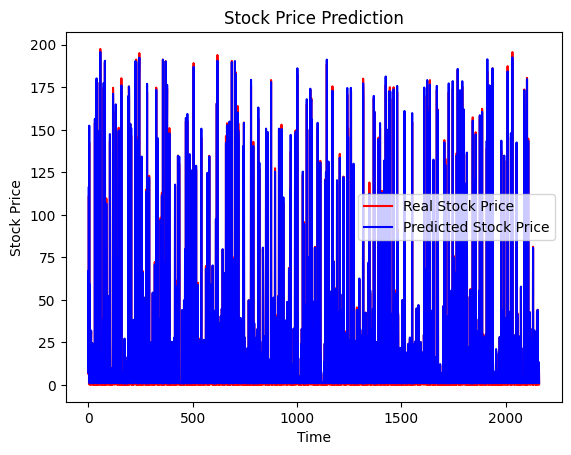

In [30]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()